Import libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import warnings

warnings.filterwarnings('ignore')

Exploratory data analysis 

In [11]:
train_file_path = 'pulsar_data_train.csv'
test_file_path = 'pulsar_data_test.csv'
df = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)
df.shape

(12528, 9)

In [12]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [13]:
# view the column names of the dataframe

col_names = df.columns

col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [14]:
# remove leading spaces from column names

df.columns = df.columns.str.strip()

In [15]:
# view column names again

df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [16]:
# rename column names

df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [17]:
# view the renamed column names

df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [18]:
# check distribution of target_class column

df['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

In [19]:
# view the percentage distribution of target_class column

df['target_class'].value_counts()/np.float(len(df))

0.0    0.907966
1.0    0.092034
Name: target_class, dtype: float64

In [20]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          12528 non-null  float64
 1   IP Sd            12528 non-null  float64
 2   IP Kurtosis      10793 non-null  float64
 3   IP Skewness      12528 non-null  float64
 4   DM-SNR Mean      12528 non-null  float64
 5   DM-SNR Sd        11350 non-null  float64
 6   DM-SNR Kurtosis  12528 non-null  float64
 7   DM-SNR Skewness  11903 non-null  float64
 8   target_class     12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


Explore missing values in variables

In [21]:
# check for missing values in variables

df.isnull().sum()

IP Mean               0
IP Sd                 0
IP Kurtosis        1735
IP Skewness           0
DM-SNR Mean           0
DM-SNR Sd          1178
DM-SNR Kurtosis       0
DM-SNR Skewness     625
target_class          0
dtype: int64

Outliners in numerical variables

In [22]:
# view summary statistics in numerical variables

round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,12528.00,12528.00,10793.00,12528.00,12528.00,11350.00,12528.00,11903.00,12528.00
mean,111.04,46.52,0.48,1.78,12.67,26.35,8.33,105.53,0.09
std,25.67,6.80,1.06,6.21,29.61,19.61,4.54,107.40,0.29
min,5.81,24.77,-1.74,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.87,42.36,0.02,-0.19,1.91,14.40,5.80,35.20,0.00
50%,115.18,46.93,0.22,0.20,2.79,18.41,8.45,83.13,0.00
75%,127.11,50.98,0.47,0.93,5.41,28.34,10.73,140.00,0.00
max,189.73,91.81,8.07,68.10,222.42,110.64,34.54,1191.00,1.00


Text(0, 0.5, 'DM-SNR Skewness')

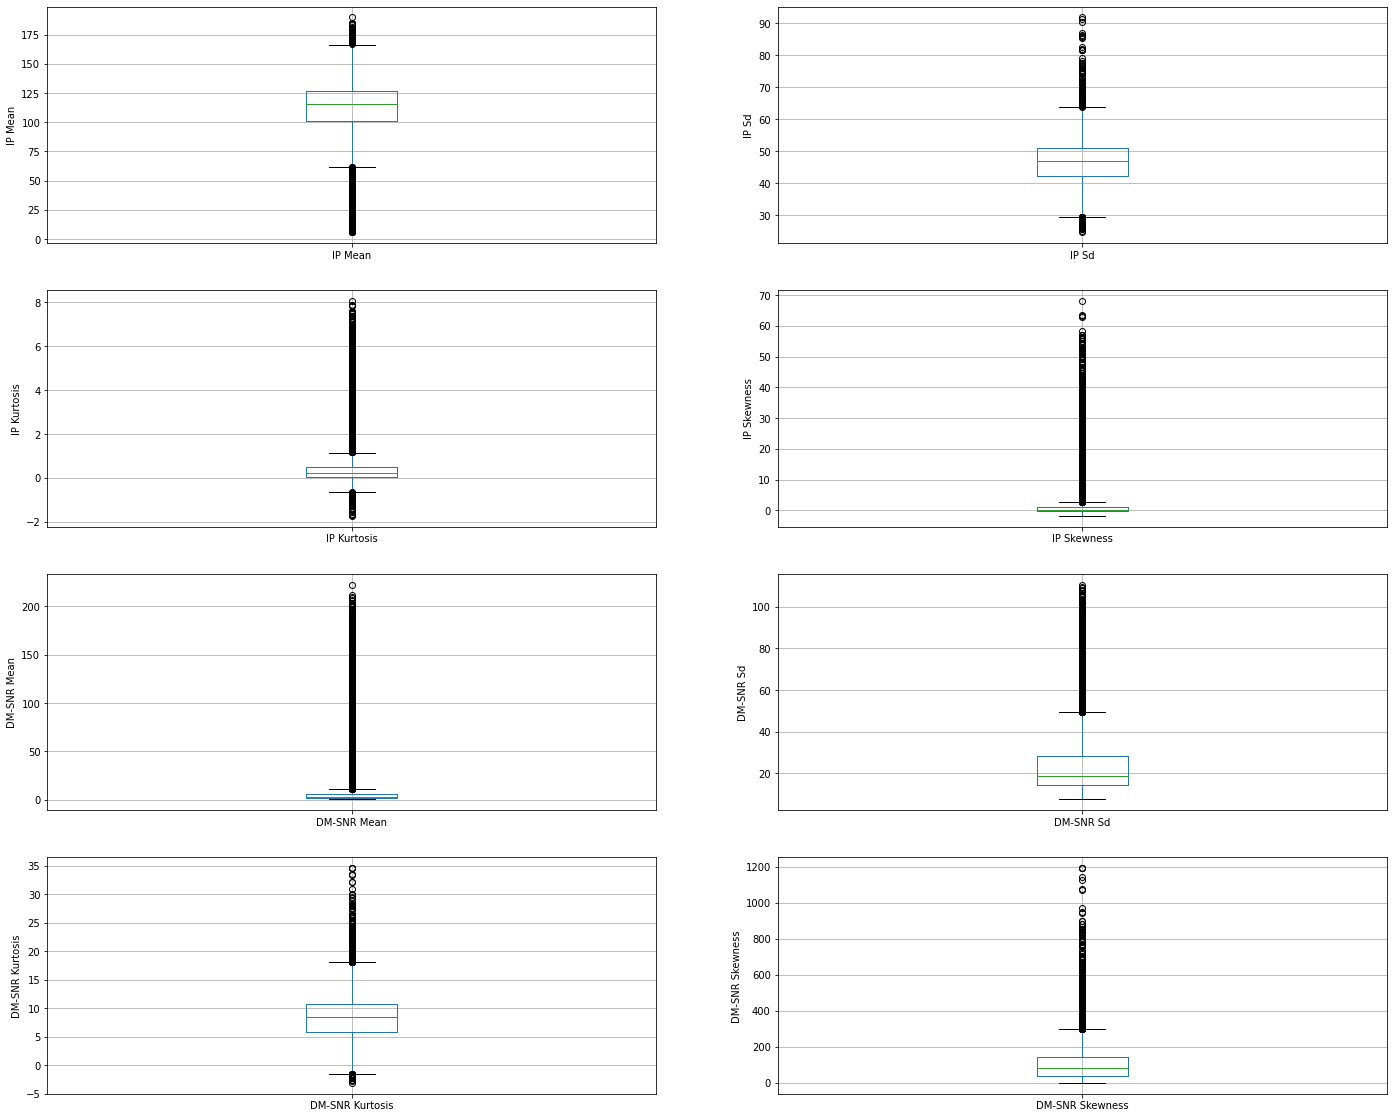

In [23]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

Check the distribution of variables

Text(0, 0.5, 'Number of pulsar stars')

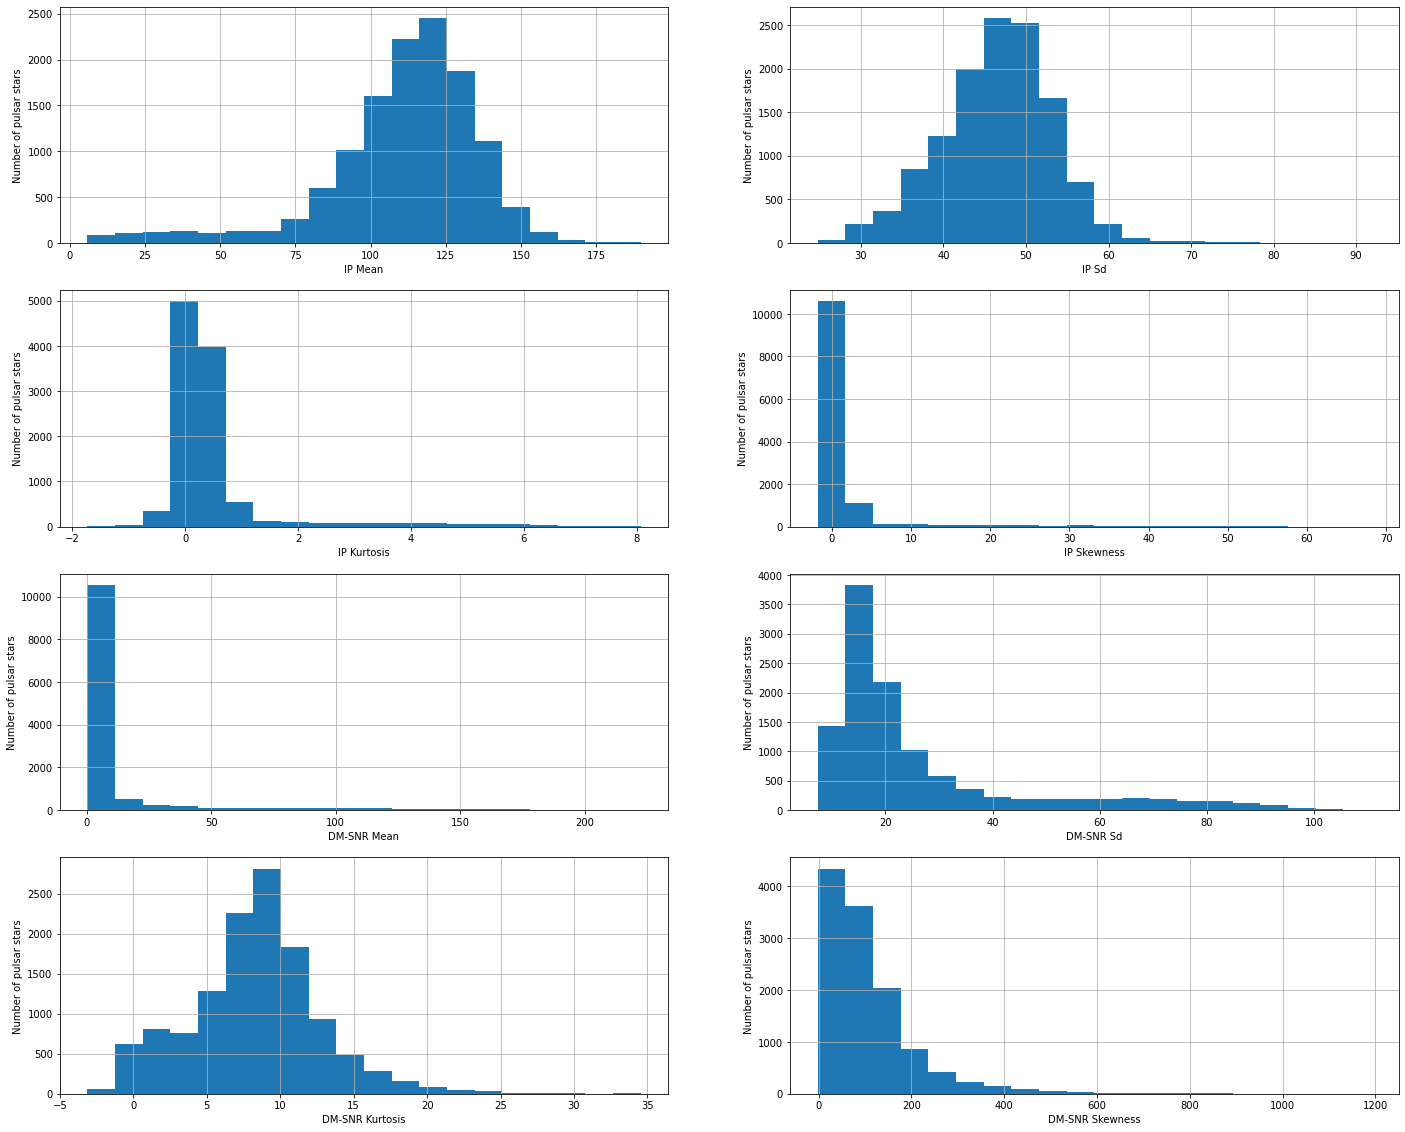

In [24]:
# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

Declare feature vector and target variable

In [25]:
X = df.drop(['target_class'], axis=1)

y = df['target_class']

Split data into separate training and test set

In [26]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((10022, 8), (2506, 8))

Feature Scaling

In [28]:
cols = X_train.columns

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [30]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [31]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [32]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.002200e+04,1.002200e+04,8.616000e+03,1.002200e+04,1.002200e+04,9.090000e+03,1.002200e+04,9.500000e+03
mean,-2.459299e-16,-7.500818e-16,-7.441432e-17,-3.175468e-17,-3.354099e-17,-1.162314e-16,-1.335768e-16,6.088697e-18
std,1.000050e+00,1.000050e+00,1.000058e+00,1.000050e+00,1.000050e+00,1.000055e+00,1.000050e+00,1.000053e+00
min,-4.059253e+00,-3.121855e+00,-2.060343e+00,-5.703669e-01,-4.225211e-01,-9.665725e-01,-2.526379e+00,-9.997646e-01
25%,-3.943394e-01,-6.101706e-01,-4.266826e-01,-3.175801e-01,-3.653436e-01,-6.094788e-01,-5.589324e-01,-6.565951e-01
50%,1.619199e-01,5.986146e-02,-2.415742e-01,-2.549120e-01,-3.355278e-01,-4.066791e-01,2.442155e-02,-2.086985e-01
75%,6.265131e-01,6.579129e-01,-1.143402e-02,-1.397269e-01,-2.459675e-01,1.018419e-01,5.276848e-01,3.194451e-01
max,3.045294e+00,6.647182e+00,7.026077e+00,1.045442e+01,7.074053e+00,4.281896e+00,5.769814e+00,1.009101e+01
